In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [124]:
df = pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


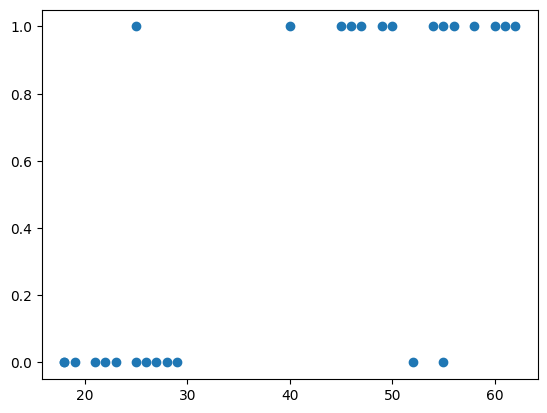

In [125]:
plt.scatter(df["age"],df["bought_insurance"],marker='o')

In [126]:
X = df[['age']]
y = df['bought_insurance']

X_train , X_test , y_train, y_test = train_test_split(df[["age"]],df[["bought_insurance"]],test_size=0.1,random_state=42)

In [127]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

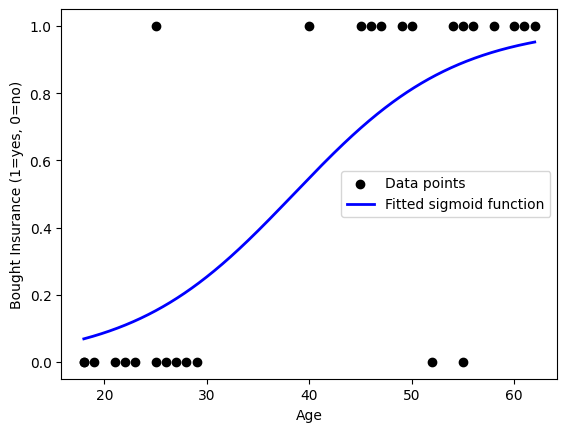

In [128]:
plt.scatter(X['age'], y, color='black', label='Data points')


x_values = np.linspace(X['age'].min(), X['age'].max(), 1000)
y_values = 1 / (1 + np.exp(-model.coef_[0][0] * x_values - model.intercept_[0]))
plt.plot(x_values, y_values, color='blue', linewidth=2, label='Fitted sigmoid function')


plt.xlabel('Age')
plt.ylabel('Bought Insurance (1=yes, 0=no)')
plt.legend()


plt.show()

# EXO2 Multiclass

In [134]:
data = pd.read_csv('data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [164]:
y = data['diagnosis']
X = data.drop(['id','diagnosis','Unnamed: 32'], axis = 1)

In [165]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3)

In [166]:
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9532163742690059

***Solvers*** : 


- **'lbfgs'** (Limited-memory Broyden–Fletcher–Goldfarb–Shanno):

Type: Optimization algorithm for smooth, unconstrained optimization problems.
Advantages: Efficient for relatively small datasets and provides a good compromise between speed and memory usage.

- **'liblinear'**:

Type: Library for linear classification and regression problems.
Advantages: Suitable for small to medium-sized datasets; works well when the number of features is much greater than the number of samples.

- **'newton-cg'** (Newton-Conjugate Gradient):

Type: Optimization algorithm for smooth, unconstrained optimization problems.
Advantages: Well-suited for problems with a moderate to large number of features; can handle both L1 and L2 regularization.

- **'newton-cholesky'**:

Type: Optimization algorithm based on Newton's method with Cholesky decomposition.
Advantages: Effective for small to medium-sized datasets with a relatively low number of features.

- **'sag'** (Stochastic Average Gradient):

Type: Optimization algorithm for large-scale machine learning problems.
Advantages: Particularly efficient for problems with a large number of samples; designed to handle sparse datasets.

- **'saga'** (SAGA - Shuffling Approximate Gradient Algorithm):

Type: Variant of the stochastic gradient descent algorithm.
Advantages: Designed to improve upon 'sag' by addressing some of its limitations; suitable for large datasets with a large number of features.




....

***penalty***{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
Specify the norm of the penalty:


- **None**: no penalty is added;

- **'l2'**: add a L2 penalty term and it is the default choice;

- **'l1'**: add a L1 penalty term;

- **'elasticnet'**: both L1 and L2 penalty terms are added.

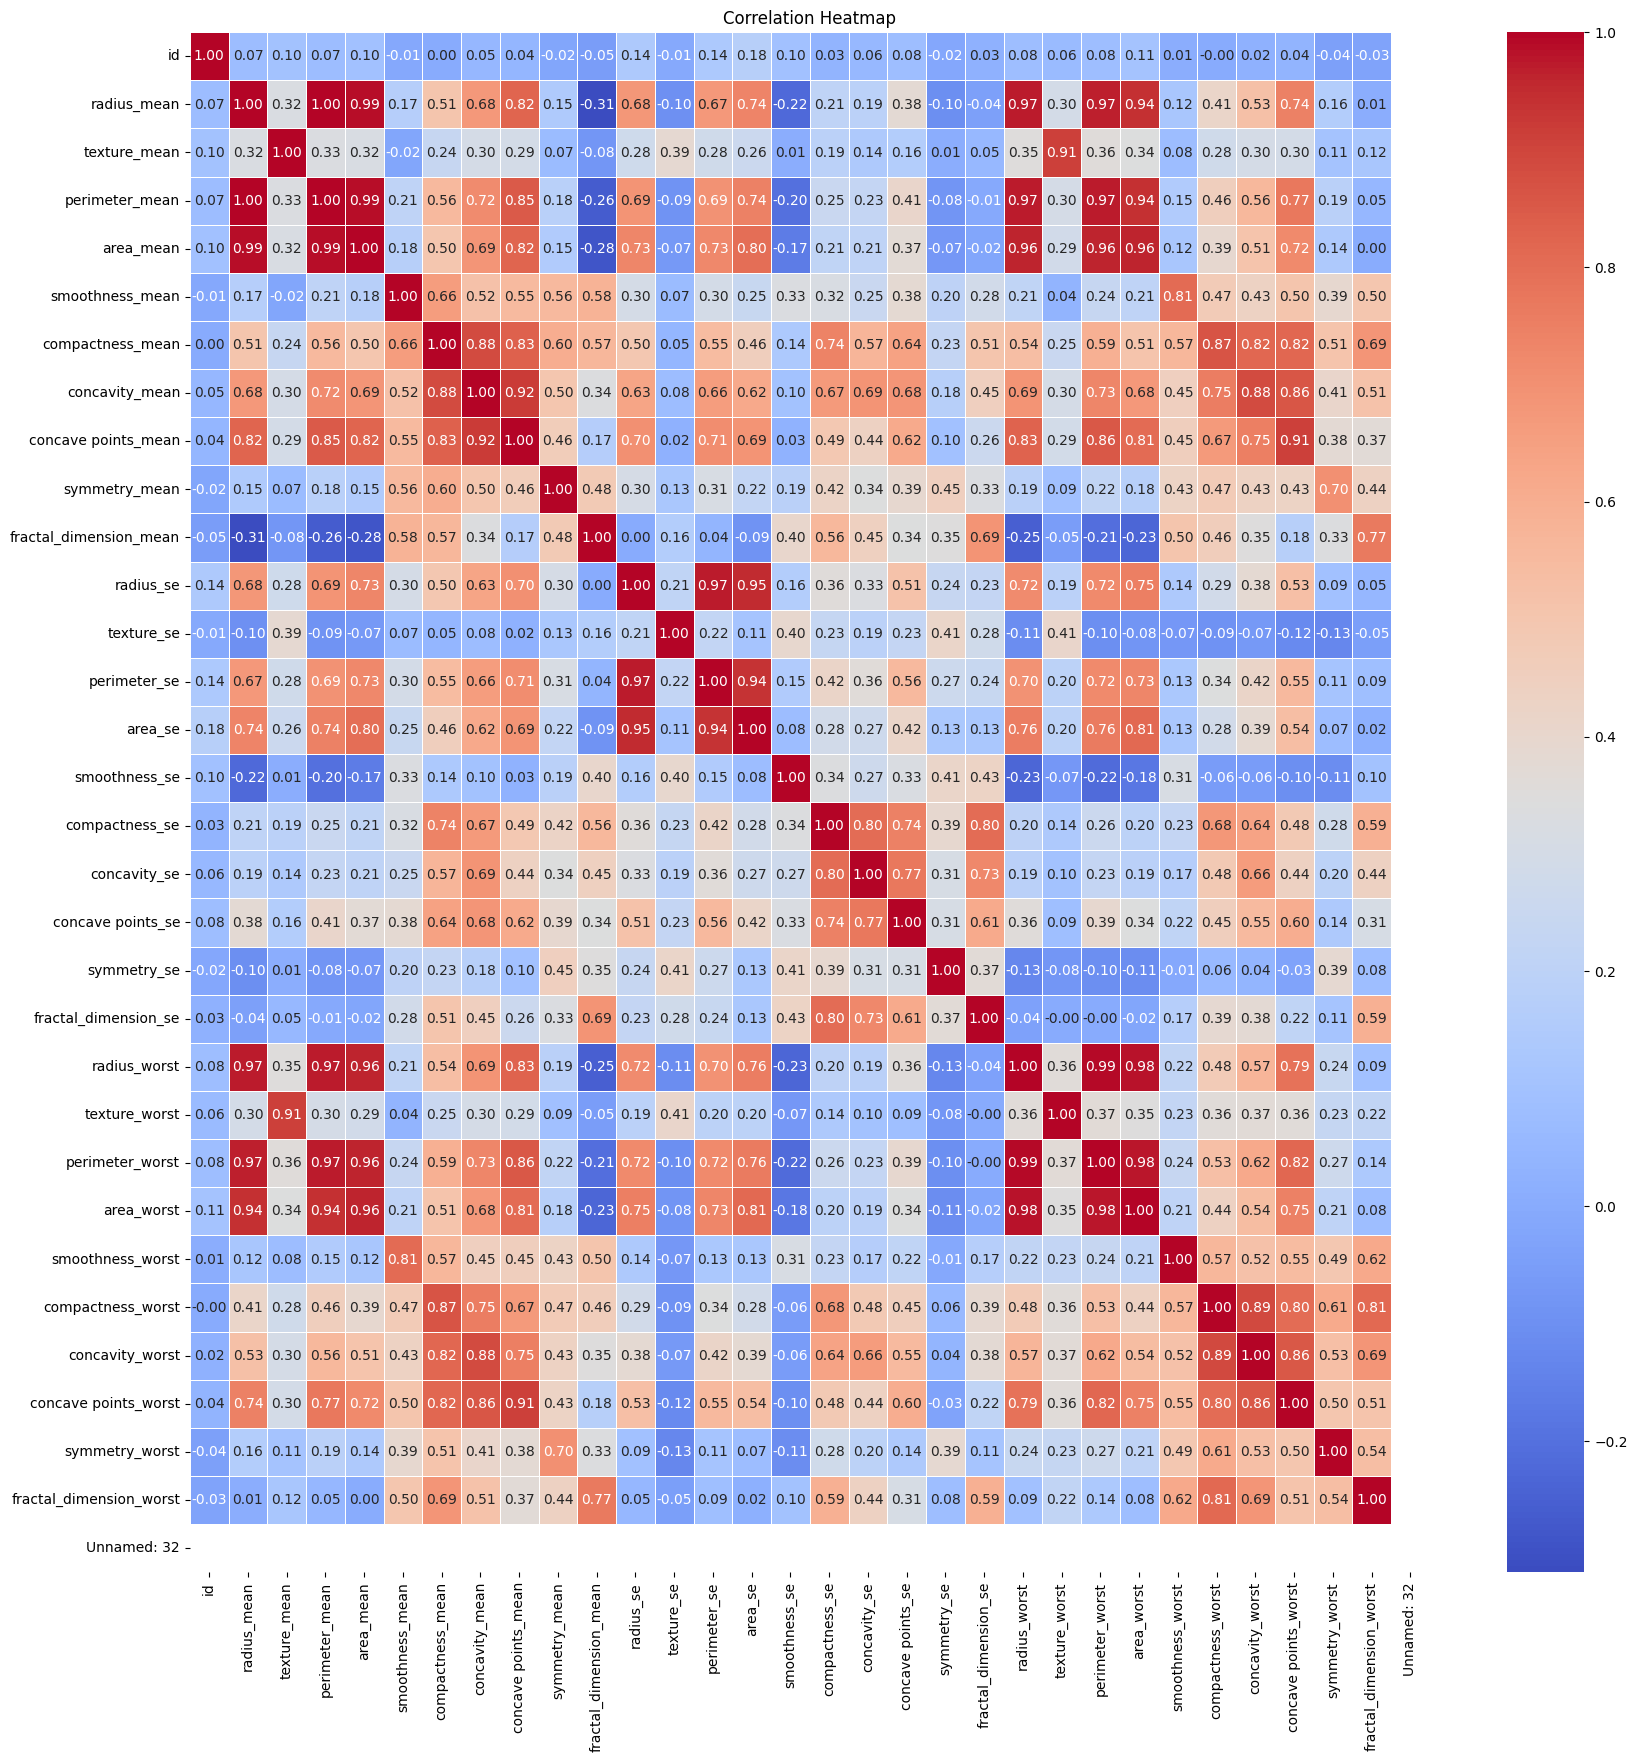

In [159]:
import seaborn as sns

correlation_matrix = data.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [167]:
model2 = LogisticRegression( penalty='l2', solver='newton-cg')
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.9590643274853801